In [1]:
%matplotlib widget

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_wine
from sklearn.pipeline import make_pipeline

# Introduction

Naive Bayes methods are a set of supervised learning algorithms based on applying Bayes’ theorem with the “naive” assumption of conditional independence between every pair of features given the value of the class variable.

In spite of their apparently over-simplified assumptions, naive Bayes classifiers have worked quite well in many real-world situations, famously document classification and spam filtering. They require a small amount of training data to estimate the necessary parameters.

Naive Bayes learners and classifiers can be extremely fast compared to more sophisticated methods. The decoupling of the class conditional feature distributions means that each distribution can be independently estimated as a one dimensional distribution. This in turn helps to alleviate problems stemming from the curse of dimensionality.

On the flip side, although naive Bayes is known as a decent classifier, it is known to be a bad estimator, so the probability outputs from predict_proba are not to be taken too seriously.

# Data Preprocessing (Feature Scaling)

Feature scaling through standardization (or Z-score normalization) can be an important preprocessing step for many machine learning algorithms. Standardization involves rescaling the features such that they have the properties of a standard normal distribution with a mean of zero and a standard deviation of one.

While many algorithms (such as SVM, K-nearest neighbors, and logistic regression) require features to be normalized, intuitively we can think of Principle Component Analysis (PCA) as being a prime example of when normalization is important. In PCA we are interested in the components that maximize the variance. If one component (e.g. human height) varies less than another (e.g. weight) because of their respective scales (meters vs. kilos), PCA might determine that the direction of maximal variance more closely corresponds with the ‘weight’ axis, if those features are not scaled. As a change in height of one meter can be considered much more important than the change in weight of one kilogram, this is clearly incorrect.

To illustrate this, PCA is performed comparing the use of data with StandardScaler applied, to unscaled data. The results are visualized and a clear difference noted. The 1st principal component in the unscaled set can be seen. It can be seen that feature #13 dominates the direction, being a whole two orders of magnitude above the other features. This is contrasted when observing the principal component for the scaled version of the data. In the scaled version, the orders of magnitude are roughly the same across all the features.

The dataset used is the Wine Dataset available at UCI. This dataset has continuous features that are heterogeneous in scale due to differing properties that they measure (i.e. alcohol content and malic acid).

The transformed data is then used to train a naive Bayes classifier, and a clear difference in prediction accuracies is observed wherein the dataset which is scaled before PCA vastly outperforms the unscaled version.


Prediction accuracy for the normal test dataset with PCA
81.48%


Prediction accuracy for the standardized test dataset with PCA
98.15%


PC 1 without scaling:
[ 1.76342917e-03 -8.35544737e-04  1.54623496e-04 -5.31136096e-03
  2.01663336e-02  1.02440667e-03  1.53155502e-03 -1.11663562e-04
  6.31071580e-04  2.32645551e-03  1.53606718e-04  7.43176482e-04
  9.99775716e-01]

PC 1 with scaling:
[ 0.13443023 -0.25680248 -0.0113463  -0.23405337  0.15840049  0.39194918
  0.41607649 -0.27871336  0.33129255 -0.11383282  0.29726413  0.38054255
  0.27507157]


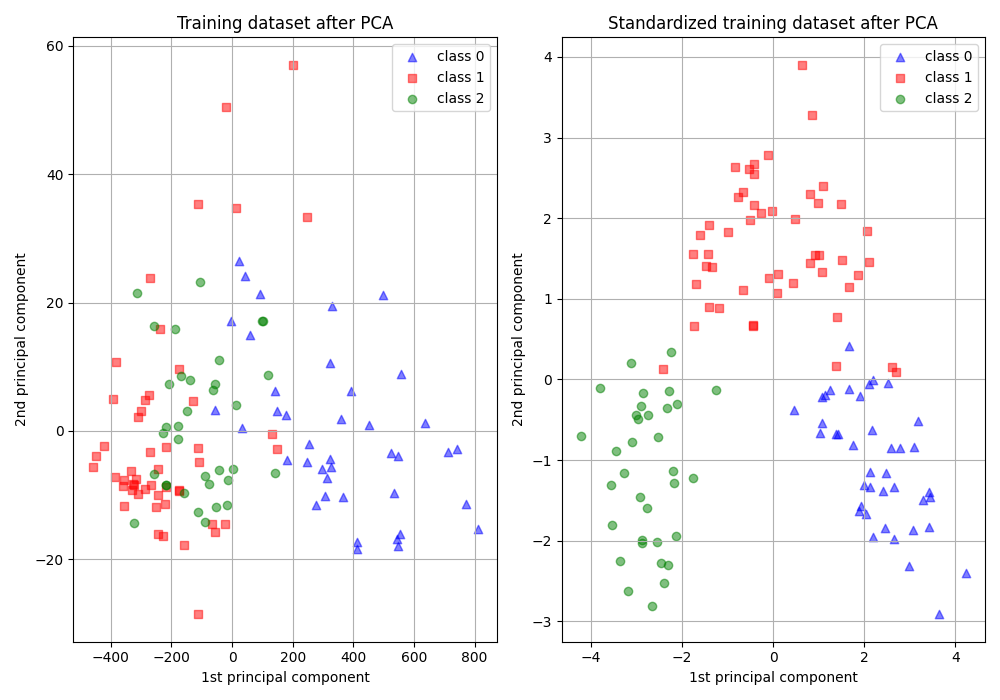

In [2]:
RANDOM_STATE = 42
FIG_SIZE = (10, 7)


features, target = load_wine(return_X_y=True)

# Make a train/test split using 30% test size
X_train, X_test, y_train, y_test = train_test_split(
    features, target, test_size=0.30, random_state=RANDOM_STATE
)

# Fit to data and predict using pipelined GNB and PCA
unscaled_clf = make_pipeline(PCA(n_components=2), GaussianNB())
unscaled_clf.fit(X_train, y_train)
pred_test = unscaled_clf.predict(X_test)

# Fit to data and predict using pipelined scaling, GNB and PCA
std_clf = make_pipeline(StandardScaler(), PCA(n_components=2), GaussianNB())
std_clf.fit(X_train, y_train)
pred_test_std = std_clf.predict(X_test)

# Show prediction accuracies in scaled and unscaled data.
print("\nPrediction accuracy for the normal test dataset with PCA")
print(f"{accuracy_score(y_test, pred_test):.2%}\n")

print("\nPrediction accuracy for the standardized test dataset with PCA")
print(f"{accuracy_score(y_test, pred_test_std):.2%}\n")

# Extract PCA from pipeline
pca = unscaled_clf.named_steps["pca"]
pca_std = std_clf.named_steps["pca"]

# Show first principal components
print(f"\nPC 1 without scaling:\n{pca.components_[0]}")
print(f"\nPC 1 with scaling:\n{pca_std.components_[0]}")

# Use PCA without and with scale on X_train data for visualization.
X_train_transformed = pca.transform(X_train)

scaler = std_clf.named_steps["standardscaler"]
scaled_X_train = scaler.transform(X_train)
X_train_std_transformed = pca_std.transform(scaled_X_train)

# visualize standardized vs. untouched dataset with PCA performed
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=FIG_SIZE)

target_classes = range(0, 3)
colors = ("blue", "red", "green")
markers = ("^", "s", "o")

for target_class, color, marker in zip(target_classes, colors, markers):
    ax1.scatter(
        x=X_train_transformed[y_train == target_class, 0],
        y=X_train_transformed[y_train == target_class, 1],
        color=color,
        label=f"class {target_class}",
        alpha=0.5,
        marker=marker,
    )

    ax2.scatter(
        x=X_train_std_transformed[y_train == target_class, 0],
        y=X_train_std_transformed[y_train == target_class, 1],
        color=color,
        label=f"class {target_class}",
        alpha=0.5,
        marker=marker,
    )

ax1.set_title("Training dataset after PCA")
ax2.set_title("Standardized training dataset after PCA")

for ax in (ax1, ax2):
    ax.set_xlabel("1st principal component")
    ax.set_ylabel("2nd principal component")
    ax.legend(loc="upper right")
    ax.grid()

plt.tight_layout()

plt.show()